<a href="https://colab.research.google.com/github/Caleb-Flegel/CS2---Code-Example/blob/master/Photoelectric_Effect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Partner: Caleb Flegel & Josh Demant

Date: 11/8/22

# Objectives
* To verify that there is a linear relationship between stopping voltage and the inverse wavelength of the exciting light in a photoelectric effect apparatus.
* To calculate Planck's constant from the slope of the best fit line to the stopping voltage vs. inverse wavelength data.

# Install and import libraries

In [4]:
!pip install whit-phys-util

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import whit_phys_util as buc
import scipy.constants as sciConst

# Connect to GitHub

In [6]:
repo = buc.local_repository("https://github.com/PS251-FA22/photoelectric-effect-1eagle")

Repository exists at this location. Pulling changes from GitHub.


# Equipment and materials
| Description | Manufacturer | Model | ID or SN |
| ----------- | ------------ | ----- | -------- |
| photoelectric effect apparatus | Daedalon | EP-05 | 1288 |
| mercury arc lamp | PASCO | OS-9286 | 001256 |
| sodium arc lamp | PASCO | OS-9287 | 001259 |
| digital multimeter | Fluke | 179 | 58870128 |
| banana cables | --- | --- | --- |
| blue and green optical filters | --- | --- | --- |
| handheld spectrometer | Project Star | Spectrometer | --- |

_You should replace the **fill in** entries with appropriate info._


# Observations of light sources

## Incandescent
The Incandescent lights emits the full spectrum of visible (and presumably a lot of non-visible) light. 

## Fluorescent
The flourescent lamps emitted most of the colors on the visible spectrum, however the difference is that the emitted light is in the form of much more distict bands. For example there was a green band at around ~555nm and a red band at around ~640nm.

## Mercury
The light from the mercury lamp was split into three distinctive bands of visible light. Other than the expected bands at ~546nm and ~436nm, we observed an amber band at ~672nm and a blue-green band at ~494nm. Some of the bands between the mercury lamp and the fluorescent light overlapped as the florescent light also uses mercury to prosuce light.

##Sodium
  The sodium lamp emits a full spectrum of visible light split into numerous color bands. However, one band at ~590nm is much brighter than any of the other bands.

# Import data

In [14]:
repo.pull()
df_pc = pd.read_table("photocurrent_vs_retarding_potential.tsv")
df_stop = pd.read_table("stopping_voltages.tsv")

In [15]:
df_pc

,Retarding Potential (V),Photocurrent(a.u.)
0,0.035,8.0
1,0.145,6.0
2,0.268,4.0
3,0.342,3.0
4,0.444,2.0
5,0.584,1.0
6,0.621,0.8
7,0.666,0.6
8,0.846,0.4
9,0.891,0.2


In [16]:
df_stop

,Hg (435.8 nm),Hg (546.0 nm),Na (589.3 nm)
0,1.045,0.475,0.532
1,1.008,0.456,0.532
2,0.997,0.490,0.509
3,0.998,0.495,0.528
4,1.001,0.465,0.526
5,0.994,0.454,0.498
6,1.008,0.481,0.507
7,1.063,0.488,0.517
8,1.028,0.446,0.504
9,1.031,0.485,0.508


# Analysis

## Dependence of photocurrent on retarding potential
435.8 nm light from a Hg lamp illuminated the cathode and the photocurrent was measured as the retarding potential was increased.

(0.0, 10.0)

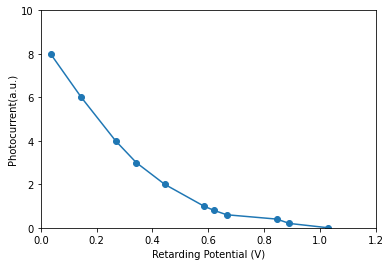

In [25]:
fig1, ax1 = plt.subplots()
ax1.plot(df_pc['Retarding Potential (V)'], df_pc['Photocurrent(a.u.)'], 'o-');

ax1.set_xlabel("Retarding Potential (V)");
ax1.set_ylabel("Photocurrent(a.u.)");
ax1.set_xlim(0.0, 1.2);
ax1.set_ylim(0.0, 10.0);

## Dependence of stopping voltage on wavelength
Stopping voltage in a photoelectric effect apparatus was measured using light with wavelengths betweeen 435.8 and 589.3 nm. This data is used to determine planks constant

In [26]:
Vstop_blue = df_stop['Hg (435.8 nm)']
Vstop_green = df_stop['Hg (546.0 nm)']
Vstop_orange = df_stop['Na (589.3 nm)']

In [27]:
Vstop = np.array([Vstop_blue.mean(), Vstop_green.mean(), Vstop_orange.mean()])

dVstop = np.array([Vstop_blue.sem(), Vstop_green.sem(), Vstop_orange.sem()])
dVstop *= 2 #convert to 95% CI

invWavelength = np.array([1/435.8, 1/546.0, 1/589.3])

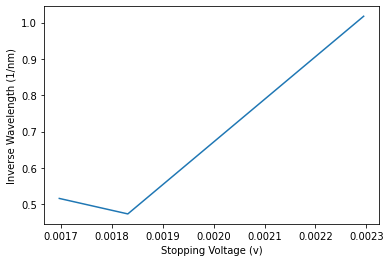

In [33]:
fig2, ax2 = plt.subplots()
ax2.plot(invWavelength, Vstop);

ax2.set_xlabel("Stopping Voltage (v)");
ax2.set_ylabel("Inverse Wavelength (1/nm)");
#ax2.set_xlim(0.4, 1.2);
#ax2.set_ylim(0.0016, 0.0024);